<a href="https://colab.research.google.com/github/tecnocrata/artificial-intelligence-course/blob/master/2.deep-learning-with-python/3_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# From chapter 3 and 3.4.1
# Importing IMDB dataset
from keras.datasets import imdb
# The argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded.
# All IMDB data is 500000, we are spliting 25000 for training and testing
(train_data, train_labels), (test_data, test_labels) = imdb.load_data( num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 2s 0us/step


# Analyzing the data

## Why is called binary classification?
It is because the output will be 0=negative or 1=positive opinion about the entry

In [3]:
# What contains train_data && test_data?
# the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
# What contains train_labels && test_labels?
# are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:
train_labels[4]

0

In [5]:
# Obtenemos el mayor indice de cualquier elemento de entrenamiento
# como definimos anteriormente el mayor valor solo deberia ser num_words=10000
max([max(s) for s in train_data])
# len(train_data[1])

9999

In [6]:
#del dict
# TIP: This function decodes one review
dict([('sape', 4139), ('guido', 4127), ('jack', 4098)])
def decode_review(review):
  word_index = imdb.get_word_index()
  reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
  # Decodes the review. Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”
  decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in review])
  return decoded_review

decode_review(train_data[0])

1646592/1641221 [==============================] - 1s 1us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# Preparing the data
## One-Hot Encoding (input values for training and testing)
For example if the input is a tensor with 10000 neurons, and we have this data [3,5], we could enconde into: [0,0,1,0,1,0,0,0,0,0....n(10000)]
More info: https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

In [7]:
import numpy as np
#def vectorize_sequences(sequences, dimension=10000): 
def onehot_encode(sequences, dimension=10000): 
  # Creamos una matriz de ceros de cantidad de elementos x 10000
  results = np.zeros((len(sequences), dimension)) 
  for i, sequence in enumerate(sequences):
    # ponemos 1 solo en la posicion de ese numero
    results[i, sequence] = 1
  return results

# Prepare data, encoding into 0s and 1s vector
x_train = onehot_encode (train_data)
x_test = onehot_encode(test_data)

# El primer elemento de entreamiento tiene 218 elementos (incluidos los repetidos
print (train_data[0])
print (len(train_data[0]))
# Si analizamos un poco mas y quitamos los duplicados (usando un set), solo hay 120 elementos unicos
print (set (train_data[0]))
print (len(set (train_data[0])))

# luego de encode ese conjunto, debe haber solo 120 'unos', y los hay!
print (x_train[0])
sum(map(lambda x : x == 1, x_train[0]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218
{1, 2, 515, 4, 5, 6, 4613, 8, 9, 7, 1029, 12, 13, 14, 15

120

## Encode (output values for training and testing)

In [8]:
print (train_data.shape)
print(train_labels.shape)
# Debemos vectorizar las salidas
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# No estoy todavia seguro cual es la diferencia entre estos dos arrays
# pero supongo que keras acepta solo numpy arrays!?
print (train_labels)
print (y_train)


(25000,)
(25000,)
[1 0 0 ... 0 1 0]
[1. 0. 0. ... 0. 1. 0.]


# Building the model architecture

In [9]:
# Where activation='relu': 
# (rectified linear unit) is a function meant to zero out negative values (Convierte en ceros valores negativos)
# Esta funcion o similares introducen no-linealidad en el aprendizaje (transformaciones)
# Alternativas:  (prelu, elu, etc...)

# Where activation='sigmoid' “squashes” arbitrary values into the [0, 1] interval, la salida puede ser interpretada como una probabilidad, que en este caso se aplica
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))



In [10]:
# Where loss='binary_crossentropy' Because you’re facing a binary classification problem and the output of your network is a probability
# crossentropy is usually the best choice when you’re dealing with models that output probabilities. 
# Alternativas: mean_squared_error

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

## Sometimes you may want to configure the parameters of your optimizer or pass a custom loss function or metric function.!!!!!
# from keras import optimizers
# from keras import losses
# from keras import metrics
# model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

# Validating the approach
In order to monitor during training the accuracy of the model on data it has never seen before, you’ll create a validation set by setting apart 10,000 samples from the original training data.

In [11]:
x_val = x_train[:10000] 
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Now, you’ll now train the model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors), in mini-batches of 512 samples.
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.4971 - acc: 0.7839 - val_loss: 0.4108 - val_acc: 0.8316
Epoch 2/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.2906 - acc: 0.9058 - val_loss: 0.3105 - val_acc: 0.8788
Epoch 3/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.2191 - acc: 0.9262 - val_loss: 0.3135 - val_acc: 0.8739
Epoch 4/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.1695 - acc: 0.9457 - val_loss: 0.2770 - val_acc: 0.8894
Epoch 5/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.1414 - acc: 0.9562 - val_loss: 0.2801 - val_acc: 0.8877
Epoch 6/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1158 - acc: 0.9647 - val_loss: 0.2978 - val_acc: 0.8861
Epoch 7/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.0922 - acc: 0.9731 - val_loss: 0.3122 - val_

In [12]:
# history is a dictionary containing data about everything that happened during training.
history_dict = history.history
print (history_dict.keys())
print (len(history_dict['val_loss']))
print (len(history_dict['acc']))
print (history_dict)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
20
20
{'val_loss': [0.41080991191864014, 0.3105463800430298, 0.3135468010425568, 0.2769597448825836, 0.2801155723571777, 0.2977542575836182, 0.31218738594055173, 0.332506684923172, 0.3557089199066162, 0.3925272272586823, 0.40834008207321165, 0.43879959998130796, 0.47693963146209717, 0.5369959932804108, 0.5379177160739899, 0.5677358263969421, 0.6078220210075378, 0.6387128232955933, 0.6685549162864685, 0.7166694494247436], 'val_acc': [0.83160001039505, 0.8787999749183655, 0.8738999962806702, 0.8894000053405762, 0.8877000212669373, 0.8860999941825867, 0.8852999806404114, 0.8822000026702881, 0.8784999847412109, 0.8734999895095825, 0.8748000264167786, 0.8744000196456909, 0.8677999973297119, 0.8672000169754028, 0.8694000244140625, 0.8676999807357788, 0.8677999973297119, 0.8651999831199646, 0.8651000261306763, 0.8651999831199646], 'loss': [0.4971457807858785, 0.2906125270207723, 0.21910206791559855, 0.16950746564070385, 0.14136464036305746, 0.

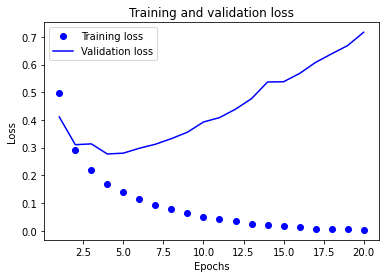

In [13]:
# let’s use Matplotlib to plot the training and validation loss, monitored during training and during validation.
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss'] 
acc = history_dict['acc'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
#“bo” is for “blue dot.”
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
#“b” is for “solid blue line”
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# the training loss decreases with every epoch!!!!
# BUT validation loss DOESN'T!!!! Why?
# Porque el modelo muestra un problema llamado overfiting, el modelo esta optimizado solo para los datos de entrenamiento!
# El overfiting se presenta alrededor de la 4 o 5 iteracion

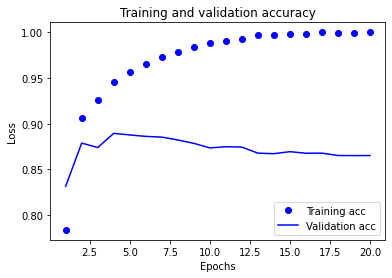

In [14]:
# Graficamos similarmente para los datos de precision (accurracy)
plt.clf() #Clears the figure 
acc_values = history_dict['acc'] 
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

# Aqui hay otra forma de ver lo mismo que se describio con la perdida (loss)
# Los datos de precision estan mejor cada epch para los datos de entrenamiento
# pero se alejan de ser precisos para los datos nuevos (datos de validacion)

# Retraining a model from scratch

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512) 
results = model.evaluate(x_test, y_test)
print(results)

# Siguiendo la recomendacion para evitar el overfiting y solo entrenar el modelo 4 epochs, 
# la precision/accurracy llega SOLO al 88%

Epoch 1/4
25000/25000 [==============================] - 3s 137us/step - loss: 0.4502 - accuracy: 0.8318
Epoch 2/4
25000/25000 [==============================] - 2s 80us/step - loss: 0.2580 - accuracy: 0.9087
Epoch 3/4
25000/25000 [==============================] - 2s 71us/step - loss: 0.1993 - accuracy: 0.9280
Epoch 4/4
25000/25000 [==============================] - 2s 69us/step
[0.29734885648727416, 0.88264000415802]


In [16]:
# Usamos el modelo para predecir sobre los datos de test
model.predict (x_test)

array([[0.13669622],
       [0.99978757],
       [0.7190314 ],
       ...,
       [0.10576409],
       [0.06172177],
       [0.6298901 ]], dtype=float32)

# Homework
Further experiments
The following experiments will help convince you that the architecture choices you’ve made are all fairly reasonable, although there’s still room for improvement:
- You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.
- Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.
- Try using the mse loss function instead of binary_crossentropy.
- Try using the tanh activation (an activation that was popular in the early days of
neural networks) instead of relu.

In [17]:
import tensorflow as tf
mydict = tf.keras.datasets.imdb.get_word_index(
    path='imdb_word_index.json'
)
list(mydict)[0:5]

['fawn', 'tsukino', 'nunnery', 'sonja', 'vani']